# 6.2 The Missing-Species Problem

### Setup

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [3]:
#plt.rc("text", usetex=True)

Load data

In [4]:
butterflies = pd.read_csv("../data/butterfly.txt", delimiter=" ", index_col="x")

In [5]:
butterflies.head()

,y
x,
1,118
2,74
3,44
4,24
5,29


### Table 6.3

The formulas in 6.19 and 6.21:

In [6]:
def nonpar_bayes(butterflies, t):
    result = 0.0
    for n_times, row in butterflies.iterrows():
        n_butterflies = row["y"]
        result += (-1)**(n_times - 1) * n_butterflies * t**n_times
    return result

def sd_hat(butterflies, t):
    variance = 0.0
    for n_times, row in butterflies.iterrows():
        n_butterflies = row["y"]
        variance += n_butterflies * t**(2 * n_times)
    return np.sqrt(variance)

In [7]:
nonpar_vals = [nonpar_bayes(butterflies, i / 10) for i in range(11)]
sd_hat_vals = [sd_hat(butterflies, i / 10) for i in range(11)]

In [8]:
tmplt = "  {:>5.2f}" * 11
print("        t    0.0    0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    0.9    1.0")
print("-" * 86)
print("     E(t)" + tmplt.format(*nonpar_vals))
print("sd_hat(t)" + tmplt.format(*sd_hat_vals))

        t    0.0    0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    0.9    1.0
--------------------------------------------------------------------------------------
     E(t)   0.00  11.10  20.96  29.79  37.79  45.17  52.15  58.93  65.57  71.56  75.00
sd_hat(t)   0.00   1.09   2.20   3.35   4.58   5.91   7.40   9.14  11.32  14.56  22.38


The $\hat{sd}$ values here do not match table 6.3 from the book. If I change the exponent in the function `sd_hat()` from `2 * n_times` to just 2, then the values match:

In [9]:
def sd_hat_noexp(butterflies, t):
    variance = 0.0
    for n_times, row in butterflies.iterrows():
        n_butterflies = row["y"]
        variance += n_butterflies * t**2  # removed `* n_times`
    return np.sqrt(variance)

sd_hat_noexp_vals = [sd_hat_noexp(butterflies, i / 10) for i in range(11)]

print("sd_hat_noexp(t)" + tmplt.format(*sd_hat_noexp_vals))

sd_hat_noexp(t)   0.00   2.24   4.48   6.71   8.95  11.19  13.43  15.67  17.91  20.14  22.38


### Figure 6.2

In [10]:
# the plot's x values
t_vals = np.array([i / 10 for i in range(11)])

In [11]:
# the parametric empirical Bayes solution from pg 81

def par_bayes(butterflies, t):
    nu = 0.104
    sigma = 89.79
    gamma = sigma / (1 + sigma)
    return butterflies.loc[1, "y"] * (1 - (1 + gamma * t)**(-nu)) / (gamma * nu)

In [12]:
par_vals = [par_bayes(butterflies, t) for t in t_vals]

Create vertical standard deviation lines for the non-parametric empirical Bayes estimates

In [13]:
sd_lines = LineCollection(
    [
        [[t, exp - sd], [t, exp + sd]]
        for t, exp, sd in zip(t_vals, nonpar_vals, sd_hat_vals)
    ],
    color="k"
)

Make the plot

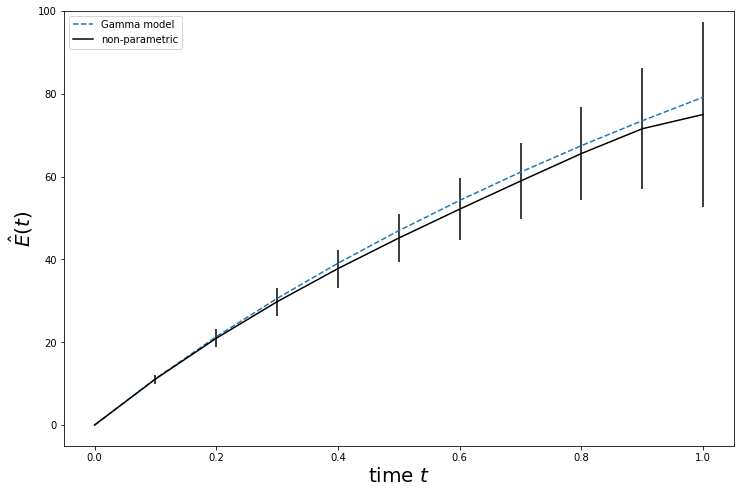

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(t_vals, par_vals, linestyle="--", label="Gamma model")
ax.plot(t_vals, nonpar_vals, c="k", label="non-parametric")
ax.add_collection(sd_lines)
ax.set_xlabel("time $t$", size=20)
ax.set_ylabel("$\hat{E}(t)$", size=20)
ax.set_ylim(-5, 100)
ax.legend(loc=2);

Calculate the Gamma model values beyond $t = 1$. In the book, these values are in the plot's legend.

In [15]:
print("t  E(t)")
print("-------")
for t in (2, 4, 8):
    n_exp = int(round(par_bayes(butterflies, t)))
    print("{}   {:>3}".format(t, n_exp))

t  E(t)
-------
2   123
4   176
8   233
